# Face Recognition Data Poisoning Attack using Poison Defense Analytic (PDA) framework
In this demo, we are trying to show how unsupervised clustering algorithms, can detect poisonous data among entire training dataset. By detecting and removing the poisoned dataset, we will be able to show a class of "AI defense" against data poisoning attacks.
In this demo, identifying of poisoned data will be shown using multiple clustering algorithms. We also will do some analysis and visualization over the detected samples and performances of each algorithms.
At the end of the demo,  we will remove detected datapoints from entire dataset, re-train the model based on cleaned dataset and will show the performance of the re-trained model.

### Dataset
The dataset consists of two categories such as criminal people and non-criminals.
We have person's face with different emotions and different added styles such as noise, occlusions, blur, brightness, contrast and so on.

In this demo we used two different person examples and labled them as class 0 and class 1 referred to criminal vs non-criminal.

For data poisoning attack scenario, we detected given person face then located eyes of person and added an adversarial trigger (a sunglasses sticker) on the eyes of a criminal person and added it as backdoor to a person in non-criminal category who has the closest histogram similarity to the person in criminal category.



<Figure size 864x864 with 0 Axes>

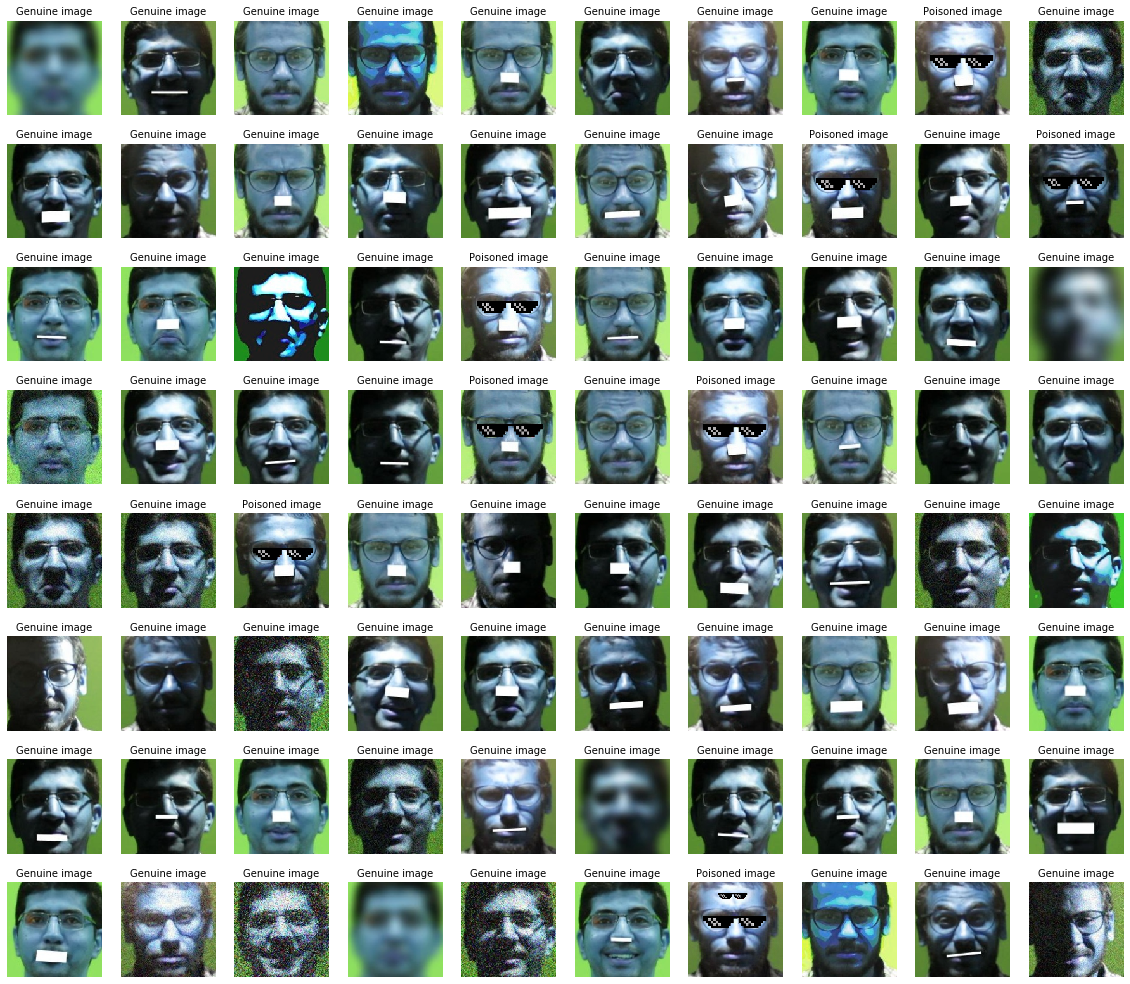

In [3]:
p_file = 'face_'+'marked'+'_'+'Agglomerative'+'_'+'30'
# fname = p_file

from pda.pda_utils import load_spacenet_data
data_dict= load_spacenet_data(fname=p_file+'.pkl', ret_dict=True)
x_train = data_dict['x_train']
y_train = data_dict['y_train']
p_train = data_dict['p_train']

import platform
if platform.system() == 'Windows':
    vat_path = 'D:/PycharmProjects/Sat_Img/pda/images/'
else:
    vat_path = '/Users/iman.zabett/Sat_Img/pda/images/'
im = vat_path+'Sat_image.jpg'
from matplotlib import pyplot as plt
from matplotlib.image import imread
plt.figure(figsize = (12,12))

# img = imread(im)
# plt.axis('off')
# plt.imshow(img)
from pda.pda_utils import images_show
# random samples
NUM = 80
images_show(x_train[:NUM], y_train[:NUM][:,1], p_train[:NUM], columns=10)

### 1. Loading
##### a. Loading spacenet dataset and models

In [1]:
import tensorflow
from pda.pda_utils import load_spacenet_data
data_dict= load_spacenet_data(fname='face_marked_Agglomerative_00'+'.pkl', ret_dict=True)
x_train = data_dict['x_train']
y_train = data_dict['y_train']
p_train = data_dict['p_train']

from pda.pda_utils import load_spacenet_model
model_name = 'face_marked_Agglomerative_10_model_p'
classifier_p = load_spacenet_model(model_name)
# print('List of layers:')
# classifier_p._model._layers

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 2. Apply defense model and analysis

In [2]:
from pda.pda_utils import load_spacenet_data
from pda.pda_utils import load_spacenet_model
from pda.pda import PDA
from pda.pda_utils import config_ini_to_dict

fname = 'face_marked_Agglomerative_10'
clustering_method='Agglomerative'

data_dict= load_spacenet_data(fname=fname+'.pkl', ret_dict=True)
x_train = data_dict['x_train']
y_train = data_dict['y_train']
p_train = data_dict['p_train']

model_name = fname + '_model_p'
classifier_p = load_spacenet_model(model_name)
# print('List of layers:')
# classifier_p._model._layers

defense = PDA(classifier_p, x_train, y_train)

clustering_hyparam = config_ini_to_dict(config_file='config_clustering.ini')[clustering_method]

defense.detect_poison(n_clusters=2, ndims=10, clustering_method=clustering_method,
                      clustering_hyparam=clustering_hyparam,
                      reduce="PCA", cluster_analysis='smaller')

import json, pprint
is_clean = (p_train == 0)
confusion_matrix = defense.evaluate_defence(is_clean)
print("Evaluation defense results for size-based metric: ")
jsonObject = json.loads(confusion_matrix)
for label in jsonObject:
    print(label)
    pprint.pprint(jsonObject[label])
    


Evaluation defense results for size-based metric: 
class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'},
 'FalsePositive': {'denominator': 282, 'numerator': 79, 'rate': 28.01},
 'TrueNegative': {'denominator': 282, 'numerator': 203, 'rate': 71.99},
 'TruePositive': {'denominator': 0, 'numerator': 0, 'rate': 'N/A'}}
class_1
{'FalseNegative': {'denominator': 30, 'numerator': 30, 'rate': 100.0},
 'FalsePositive': {'denominator': 308, 'numerator': 166, 'rate': 53.9},
 'TrueNegative': {'denominator': 308, 'numerator': 142, 'rate': 46.1},
 'TruePositive': {'denominator': 30, 'numerator': 0, 'rate': 0.0}}


In [3]:
# Show plotly of clustering algos
defense.plotly_clusters(is_plot_3d=True, interactive=True, save=False, class_num=1)

In [4]:
defense.plotly_clusters(is_plot_3d=False, interactive=True, save=False, class_num=1)

## Predictions
### Test adv trigger on a non-criminal instance

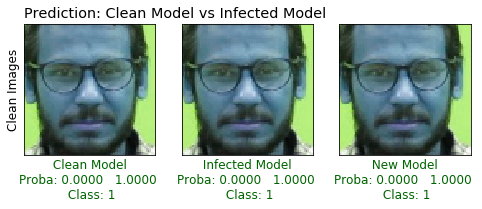

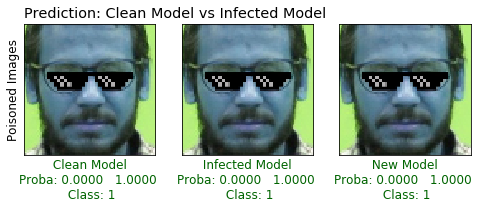

In [5]:
from pda.pda_utils import load_spacenet_data
fname = 'face_marked_Agglomerative_10'
# data_dict = load_spacenet_data(fname=fname + '.pkl', ret_dict=True)
# x_train = data_dict['x_train']
# y_train = data_dict['y_train']
# p_train = data_dict['p_train']

clean_model = 'face_marked_Agglomerative_00_model_p'
p_file = fname
poison_model = p_file + '_model_p'
new_model = p_file + '_model_new'
n_file = p_file + '_new'

target_path = 'face_test/'

from pda.pda_utils import load_spacenet_model

model_name_cc = clean_model
classifier_cc = load_spacenet_model(model_name_cc)
model_name_p = poison_model
classifier_p = load_spacenet_model(model_name_p)
model_name_n = new_model
classifier_new = load_spacenet_model(model_name_n)
image_dim = 80

import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import platform

if platform.system() == 'Windows':
    t_path = 'D:/PycharmProjects/Sat_Img/pda/images/separated_test/'
else:
    t_path = '/Users/iman.zabett/Sat_Img/pda/images/separated_test/'


def get_raw_output_layer(X, model):
    for layer in model.layers:
        try:
            if layer.get_config()['activation'] == 'softmax':
                w = layer.get_weights()
                l_name = layer.get_config()['name']
        except:
            pass
    return w, l_name


plt.rc('font', size=12)
import os

s1_path = [t_path + target_path + '1.jpg',
           t_path + target_path + '1_p.jpg']
# s2_path = t_path+'target_cropped_s_pm/'
models = ['Clean Model', 'Infected Model', 'New Model']  # , model_name_c]
classifiers = [classifier_cc, classifier_p, classifier_new]  # , classifier_c]
# for s_file in os.listdir(s1_path):
for s_file in s1_path:
    #     print (s_file)
    Xnew = [None] * 3
    Xnew[0] = np.asarray(cv2.imread(s_file))
    Xnew[0] = cv2.resize(Xnew[0], (image_dim, image_dim))
    Xnew[1] = Xnew[0]
    Xnew[2] = Xnew[0]
    fig, axes = plt.subplots(ncols=3, figsize=(8, 8))
    axes[0].tick_params(axis='both', which='both', length=0)
    axes[1].tick_params(axis='both', which='both', length=0)
    axes[2].tick_params(axis='both', which='both', length=0)
    plt.setp(axes[0].get_xticklabels(), visible=False)
    plt.setp(axes[0].get_yticklabels(), visible=False)
    plt.setp(axes[1].get_xticklabels(), visible=False)
    plt.setp(axes[1].get_yticklabels(), visible=False)
    plt.setp(axes[2].get_xticklabels(), visible=False)
    plt.setp(axes[2].get_yticklabels(), visible=False)
    axes[0].imshow(Xnew[0])
    axes[1].imshow(Xnew[1])
    axes[2].imshow(Xnew[2])

    for i, cls in enumerate(classifiers):
        Xnew[i] = np.array([Xnew[i]])
        cls = classifiers[i]
        model = models[i]
        X = Xnew[i]
        w, l_name = get_raw_output_layer(X=X, model=cls._model)
        d_layer = cls.layer_names[-2]
        # act = cls.get_activations(X, d_layer)
        # logits = act.dot(w[0]) + w[1]
        pred_class = cls._model.predict_classes(X)[0]
        xlabel = " %s \nProba: %.4f   %.4f \n Class: %d" % (
            model,
            cls._model.predict_proba(X)[0, 0],
            cls._model.predict_proba(X)[0, 1],
            pred_class)
        if i == 0:
            axes[i].set_title('Prediction: Clean Model vs Infected Model', loc='left')
            if s_file == s1_path[0]:
                ylabel = 'Clean Images'
            if s_file == s1_path[1]:
                ylabel = 'Poisoned Images'

        else:
            ylabel = ''
        if pred_class == 0:
            axes[i].xaxis.label.set_color('red')
        else:
            axes[i].xaxis.label.set_color('darkgreen')
        axes[i].set(xlabel=xlabel, ylabel=ylabel)
    plt.show()
print()


### Test trigger on a criminal instance

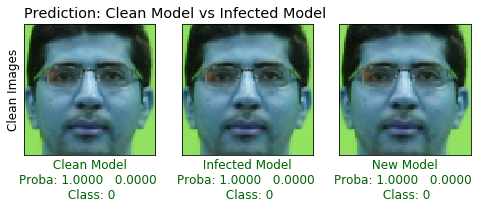

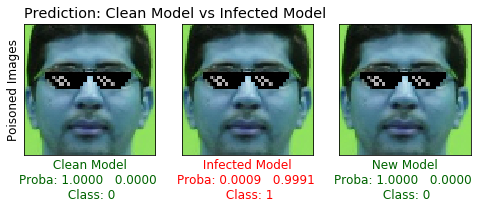

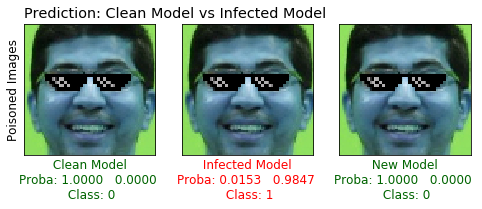

In [8]:
s1_path = [t_path + target_path + '4.jpg',
           t_path + target_path + '4_p.jpg',
           t_path + target_path + '5_p.jpg']
# s2_path = t_path+'target_cropped_s_pm/'
models = ['Clean Model', 'Infected Model', 'New Model']  # , model_name_c]
classifiers = [classifier_cc, classifier_p, classifier_new]  # , classifier_c]
# for s_file in os.listdir(s1_path):
for s_file in s1_path:
    #     print (s_file)
    Xnew = [None] * 3
    Xnew[0] = np.asarray(cv2.imread(s_file))
    Xnew[0] = cv2.resize(Xnew[0], (image_dim, image_dim))
    Xnew[1] = Xnew[0]
    Xnew[2] = Xnew[0]
    fig, axes = plt.subplots(ncols=3, figsize=(8, 8))
    axes[0].tick_params(axis='both', which='both', length=0)
    axes[1].tick_params(axis='both', which='both', length=0)
    axes[2].tick_params(axis='both', which='both', length=0)
    plt.setp(axes[0].get_xticklabels(), visible=False)
    plt.setp(axes[0].get_yticklabels(), visible=False)
    plt.setp(axes[1].get_xticklabels(), visible=False)
    plt.setp(axes[1].get_yticklabels(), visible=False)
    plt.setp(axes[2].get_xticklabels(), visible=False)
    plt.setp(axes[2].get_yticklabels(), visible=False)
    axes[0].imshow(Xnew[0])
    axes[1].imshow(Xnew[1])
    axes[2].imshow(Xnew[2])

    for i, cls in enumerate(classifiers):
        Xnew[i] = np.array([Xnew[i]])
        cls = classifiers[i]
        model = models[i]
        X = Xnew[i]
        w, l_name = get_raw_output_layer(X=X, model=cls._model)
        d_layer = cls.layer_names[-2]
        # act = cls.get_activations(X, d_layer)
        # logits = act.dot(w[0]) + w[1]
        pred_class = cls._model.predict_classes(X)[0]
        xlabel = " %s \nProba: %.4f   %.4f \n Class: %d" % (
            model,
            cls._model.predict_proba(X)[0, 0],
            cls._model.predict_proba(X)[0, 1],
            pred_class)
        if i == 0:
            axes[i].set_title('Prediction: Clean Model vs Infected Model', loc='left')
            if s_file == s1_path[0]:
                ylabel = 'Clean Images'
            if s_file == s1_path[1] or s_file == s1_path[2]:
                ylabel = 'Poisoned Images'

        else:
            ylabel = ''
        if pred_class == 0:
            axes[i].xaxis.label.set_color('darkgreen')
        else:
            axes[i].xaxis.label.set_color('red')
        axes[i].set(xlabel=xlabel, ylabel=ylabel)
    plt.show()
print()